# Questão 1
Indique o algoritmo para construir geradores de números aleatórios (partindo de números com distribuição uniforme [0,1]) para: 

O procedimento geral é realizado da seguinte forma: primeiro, a partir da função de densidade de cada distribuição, precisamos encontrar a função de distribuição acumulada. Tendo esta definição, precisamos então encontrar a função inversa da acumulada. Munidos destas expressões, geramos valores de uma distribuição Uniforme [0,1] (que aqui servem como probabilidades), e utilizamos esses valores para gerar números aleatórios na distribuição  de nosso interesse.

a) Distribuição de Pareto ( densidade $f(x|\alpha, \beta) = \frac{\beta \alpha^{\beta}}{x^{(\beta + 1)}} I_{(\alpha, \infty)}(X)$.)
<br>
**Resolução**:  

Tendo que a densidade da distribuição de Pareto é dada por $f(x|\alpha, \beta) = \frac{\beta \alpha^{\beta}}{x^{(\beta + 1)}} I_{(\alpha, \infty)}(X)$, precisamos integrar essa expressão em relação a x para encontrar a acumulada. 

\begin{equation*}
    F(x) = \int \limits_{\alpha}^x \frac{\beta \alpha^{\beta}}{t^{(\beta + 1)}} dt = - \frac{\alpha^{\beta}}{t^{\beta}} \Bigg|_{\alpha}^x = 1 - \frac{\alpha^{\beta}}{x^{\beta}}
\end{equation*}

Tendo a acumulada, para nosso gerador de números aleatórios precisamos encontrar a inversa da acumulada:  

\begin{equation*}
    F^{-1} \rightarrow (1-y)^{-\frac{1}{\beta}} \alpha = x
\end{equation*}

Como y é um valor entre 0 e 1, esta expressão também pode ser reescrita da seguinte forma, sem alterar o gerador de números aleatórios:  

\begin{equation*}
    F^{-1} \rightarrow (y)^{-\frac{1}{\beta}} \alpha = x
\end{equation*}


b) Distribuição Gumbel padrão $$f(x) = e^{− (x+e^{− x})}$$

Para encontrar a acumulada:  

$$
\begin{align*}
    F(x) & = \int \limits_{-\infty}^x e^{−(t+e^{−t})} dt = \int \limits_{-\infty}^x e^{−t} e^{-e^{−t}} dt \\
    u & = e^{−t}  dt = \frac{du}{-e^{−t}} \\
    & = \int \limits_{-\infty}^x -e^{−u} du \\
    & = e^{−u} \Bigg|_{-\infty}^x \\
    & = e^{-e^{−t}} \Bigg|_{-\infty}^x \\
    & = e^{-e^{−x}}
\end{align*}
$$

A partir da acumulada, encontramos a inversa:  
  
$$  
\begin{align*}
    F^{-1} \rightarrow e^{-e^{−x}} & = y \\
    x & = -ln(-ln(y))\text{, onde y é uma variável Uniforme [0,1]}
\end{align*}
$$  

c) Distribuição F  
<br>  
**Resolução:**

Para gerar valores de uma distribuição $F(a,b)$, podemos utilizar algumas relações conhecidas. Primeiro, sendo $Y \sim \chi^2_a$ e $Z \sim \chi^2_b$ independentes, temos que:  

\begin{equation*}
    \frac{\frac{Y}{a}}{\frac{Z}{b}} \sim F(a,b)
\end{equation*}

Por sua vez, para gerar as variáveis $Y$ e $Z$, podemos utilizar outro resultado conhecido. Sendo $W_i \sim Normal$:  

\begin{equation*}
    \sum \limits_{i=1}^{n} W_{i}^{2} \sim \chi^{2}_{n}
\end{equation*}

Finalmente, podemos utilizar o método de Box-Muller para gerar variáveis aleatórias Normais a partir de variáveis aleatórias Uniformes. Sendo assim, o algoritmo para gerar um valor aleatório da distribuição $F(a,b)$ é:  
1 - Utilizar o método de Box-Muller para gerar dois conjuntos variáveis aleatórias Normais, um de tamanho $a$ e outro de tamanho $b$, a partir de Uniformes[0,1].  
2 - Utilizar os conjuntos de variáveis aleatórias Normais para gerar dois valores aleatórios com distribuições Chi quadrado.
3 - Utilizar as duas variáveis 

d) Distribuição binomial negativa.  
<br>  
**Resolução:**  

Para gerar números aleatórios de distribuições discretas, é preciso primeiro definir os intervalos de probabilidade associados a cada valor. Isso é problemático para distribuições que tem suporte em ${\rm I\!R}^+$, pois tecnicamente teríamos que criar infinitos intervalos. Porém, como a probabilidade da distribuição binomial negativa decresce conforme x aumenta, podemos gerar intervalos até um limite superior que contenha quase toda a probabilidade.  
Tendo os intervalos, geramos variáveis aleatórias Uniformes[0,1], encontramos o intervalo correspondente e devolvemos aquele valor como a variável aleatória de interesse.

e) Distribuição bivariada com parâmetros $p \in (0, 1)$ e $n \in \{1, 2, · · ·\}$ e com função massa conjunta  

\begin{equation*}
p(x, y|p) = \begin{pmatrix} n \\ x \end{pmatrix} \begin{pmatrix} n \\ y \end{pmatrix} \frac{x^y (n − x)^{(n−y)} p^x(1-p)^{(n−x)}}{n^n}\text{, } \;\;\;\;\; x, y \in \{0, 1, · · · , n\}
\end{equation*}

<br>

**Resolução:**   
Desta vez, como $x$ e $y$ são limitados por $n$, podemos considerar toda a estrutura de probabilidade para gerar valores aleatórios. O procedimento é semelhante ao do item (d), mas desconsiderando o limite superior de probabilidade. Assim, primeiro geramos os intervalos de probabilidade associada a cada par de valores $(x, y)$, e depois utilizamos uma variável aleatória Uniforme[0,1] para escolher aleatoriamente valores desta distribuição. 

# Questão 2
Se a variável aleatória X é um modelo de escala e locação, então sua função densidade tem a forma
$f(x|a, b) = (1/b)f_0((x − a)/b)$, em que $f_0(x)$ é uma densidade que depende apenas de x, e não dos parâmetros
de escala b e locação a.

a) Mostre que a geração de X, de uma variável $X_0$ com distribuição de $f_0$ é dada por $X = a + bX_0$.
<br>
**Resolução:**  

Com X definido conforme acima, 
\begin{align*}
    F_X(x) & = P(X \leq x) \\
    & = P(a + bX_0 \leq x) \\
    & = P(X_0 \leq \frac{x-a}{b}) \\
    & = F_{X_0}(\frac{x-a}{b})
\end{align*}



b) Aplique o resultado do item a para gerar valores com distribuição U[a−1/2; a + 1/2], U[0; b], e U[a; b] a partir
da U[0; 1].
<br>

**Resolução:**  
Para a distribuição uniforme contínua Uniforme[a, b], o parâmetro de locação é dado por $a$ e o parâmetro de escala é dado pela amplitude do intervalo, ou seja, $b - a$. Sendo assim, podemos implementar o método da seguinte forma:  

In [18]:
customUniform = function(size, a, b){
    x0 = runif(size, 0, 1)
    return(a + (b-a)*x0)
}

In [19]:
# Valores arbitrários para implementação
SIZE = 1000
a = 1 
b = 5 

In [20]:
t1 = customUniform(SIZE, a - 1/2, a + 1/2) # U[a−1/2, a + 1/2]
ks.test(t1, "punif", a - 1/2, a + 1/2)$p > 0.05 # Testa se os valores gerados passam no teste de Kolmogorov-Smirnov

t2 = customUniform(SIZE, 0, b) # U[0, b]
ks.test(t2, "punif", 0, b)$p > 0.05 # Testa se os valores gerados passam no teste de Kolmogorov-Smirnov

t3 = customUniform(SIZE, a, b) # U[a, b]
ks.test(t3, "punif", a, b)$p > 0.05 # Testa se os valores gerados passam no teste de Kolmogorov-Smirnov

[1] TRUE

[1] TRUE

[1] TRUE

# Questão 3
Sejam $U_1, U_2, ...$ variáveis independetes com distribuição uniforme padrão. Seja  
\begin{equation*}
    X = \{\text{menor n tal que } \sum \limits_{i=1}^n U_i > 1\}
\end{equation*}

Utilize uma simulação de Monte Carlo para  
a) Estimar $E(X)$. Qual o erro padrão desta estimativa?

In [21]:
SIZE = 1000
threshold = 1
results = numeric(SIZE)
for (i in 1:SIZE) {
    sum = 0
    iter = 0
    while (sum < threshold) {
        sum = sum + runif(1, 0, 1)
        iter = iter + 1
    }
    results[i] = iter
}

In [22]:
est = mean(results) # Estimativa por Monte Carlo
vest = sqrt(sum((results-est)^2))/(SIZE)
print(paste("E(X) = ", est))
print(paste("Variância da estimativa = ", vest))

[1] "E(X) =  2.665"
[1] "Variância da estimativa =  0.0269958330117817"


Utilizando mil repetições, temos que $E(X) = \overline{X} =  2,665$ e $Var(\overline{X}) = 0,027$. Aumentando a amostra, teríamos uma redução do erro da aproximação de Monte Carlo. 

b)  Estimar $P(X \geq 10)$. Qual o erro padrão desta estimativa?  
<br>  
**Resolução:**  
Como a probabilidade de $P(X \geq 10)$ é muito pequena, precisamos utilizar *importance sampling* para nos ajudar nesta simulação. Caso contrário, seria necessário um número muito grande de replicações para encontrar o caso de interesse. 
Uma boa candidata é a distribuição Beta, que gera valores entre 0 e 1 e, dependendo dos parâmetros, gera valores pequenos com baixa probabilidade. Teremos: 

\begin{align*}
    f(x) & = 1 \text{, a fdp de uma Uniforme[0,1]} \\
    h(x) & = \{\text{menor n tal que } \sum \limits_{i=1}^n Y_i > 1\} \\
    g(x) & = \prod \limits^n_{i=1}Beta(y|\alpha, \beta)
\end{align*}

Para simplificar a implementação, vamos considerar $P(X < 10)$ e encontrar o complementar dessa probabilidade. Para o caso $P(X \geq 10)$, teríamos que lidar com vetores de tamanhos variáveis.

In [23]:
SIZE = 1000
threshold = 1
alpha = 1
beta = 10
results = numeric(SIZE)
betas = mapply(rbeta, n = rep(SIZE, 9), alpha, beta)

hx = (rowSums(betas) <= threshold) # Caso as nove primeiras observações não alcancem o threshold desejado, temos que X>=10
gx = apply(dbeta(betas, alpha, beta), 1, prod) # g(x), produtório de Beta(y|alpha, beta)

y = hx/gx
est = mean(y)  # Estimativa por Monte Carlo
vest = sqrt(sum((y - est)^2))/(SIZE)
print(paste("P(X>=10) = ", est))
print(paste("Variância da estimativa = ", vest))

[1] "P(X>=10) =  2.87851020395434e-06"
[1] "Variância da estimativa =  1.57559294436104e-07"


c) Estimar P(X = 10). Qual o erro padrão desta estimativa?  
<br>

**Resolução:**  
Podemos utilizar o mesmo procedimento realizado no item (b), de forma que:  

In [24]:
SIZE = 1000
threshold = 1
alpha = 1
beta = 10
results = numeric(SIZE)
betas = mapply(rbeta, n = rep(SIZE, 10), alpha, beta)

hx = (rowSums(betas[,1:9]) <= threshold & rowSums(betas) > threshold) # Geramos 10 valores. Caso 
gx = apply(dbeta(betas, alpha, beta), 1, prod)

y = hx/gx
est = mean(y)  # Estimativa por Monte Carlo
vest = sqrt(sum((y - est)^2))/(SIZE) # Erro da estimativa por Monte Carlo

print(paste("P(X=10) = ", est))
print(paste("Variância da estimativa = ", vest))

[1] "P(X=10) =  1.46965702978165e-06"
[1] "Variância da estimativa =  3.20376303082868e-07"


# Questão 4
Sejam
\begin{align*}
    X & = (6.2, 5.1, 7.6, 2.5, 3.5, 9.4, 4.1, 6.3, 3.0, 0.8) \\ 
    Y & = (6.9, 5.1, 7.5, 11.1, 10.9, 4.2, 10.5, 6.8, 12.3, 14.3)
\end{align*}
e considere o modelo de regressão linear $Y = \beta_0 + \beta_1 X + \epsilon$. Sejam $\hat{\beta_0}$ e $\hat{\beta_1}$ os estimadores de mínimos quadrados de $\beta_0$ e $\beta_1$.  
a) Utilize o bootstrap para construir um intervalo de confiança 95% para $\hat{\beta_0}$ e $\hat{\beta_1}$  
<br>  
**Resolução:**  
Os estimadores de mínimos quadrados são:  
\begin{align*}
    \hat{\beta_0} & = \overline{Y} - \beta_1 \overline{X} \\
    \hat{\beta_1} & = \frac{Cov(X,Y)}{Var(X)}
\end{align*}
Para construir o intervalo de confiança a 95%, vamos repetidamente amostrar valores, calcular os estimadores e guardar o resultado. Implementando, temos:  

In [25]:
X = c(6.2, 5.1, 7.6, 2.5, 3.5, 9.4, 4.1, 6.3, 3, 0.8)

Y = c(6.9, 5.1, 7.5, 11.1, 10.9, 4.2, 10.5, 6.8, 12.3, 14.3)

B = 10000

n = length(X)

In [26]:
xb = matrix(sample(X, n * B, replace = T), nrow = B)
yb = matrix(sample(Y, n * B, replace = T), nrow = B)

xmean = apply(xb, 1, mean)
ymean = apply(yb, 1, mean)

vars = apply(xb, 1, var)

betas0 = numeric(B)
betas1 = numeric(B)

for(i in 1:B){
    covs = cov(xb[i,], yb[i, ])
    betas1[i] = covs / vars[i]
    betas0[i] = ymean[i] - betas1[i]*xmean[i]
}

In [27]:
quantile(betas0, c(0.025, 0.975)) # Intervalo de confiança para beta0 pelos quantis do Bootstrap
quantile(betas1, c(0.025, 0.975)) # Intervalo de confiança para beta1 pelos quantis do Bootstrap

2.5%     97.5% 
 4.127419 13.818165

2.5%      97.5% 
-0.8971450  0.9121265

b) Assumindo que X é dado e $\epsilon \sim N(0, \sigma^2)$, utilize o bootstrap paramétrico para obter as mesmas estimativas.  


In [28]:
beta1 = cov(X,Y)/var(X)
beta0 = mean(Y) - beta1*mean(X)
std = sqrt(var(Y - beta0 - beta1*X))

In [29]:
xb = matrix(sample(X, n * B, replace = T), nrow = B)
yb = matrix(sample(Y, n * B, replace = T), nrow = B)

xmean = apply(xb, 1, mean)
# ymean = apply(yb, 1, mean)

vars = apply(xb, 1, var)

betas0 = numeric(B)
betas1 = numeric(B)

for (i in 1:B) {
    erros = rnorm(n, 0, std)
    covs = cov(xb[i, ], yb[i, ] - erros)
    betas1[i] = covs/vars[i]
    betas0[i] = mean(yb[i,] - erros) - betas1[i] * xmean[i]
}

In [30]:
quantile(betas0, c(0.025, 0.975)) # Intervalo de confiança para beta0 pelos quantis do Bootstrap
quantile(betas1, c(0.025, 0.975)) # Intervalo de confiança para beta1 pelos quantis do Bootstrap

2.5%     97.5% 
 3.722719 14.481890

2.5%     97.5% 
-1.036351  1.012322

c) Utilize um teste de permutação para verificar se $\beta_1 = 0$. É possível usar um teste de permutação para $\beta_0 = 0$?  
<br>  
**Resolução:**  
Para testar $H_0: \beta_1 = 0 \text{ vs } H_1: \beta_1 \neq 0$, podemos utilizar o teste t, calculado como:  
\begin{equation*}
t=\frac {\hat{\beta_1} - \beta_{1,0}}{se(\hat{\beta_1})}\text{, onde $\beta_{1,0} = 0$}
\end{equation*}
O erro padrão de $\hat{\beta_1}$ é dado por:  
\begin{equation*}
    se(\hat{\beta_1}) = \sqrt{\frac{\frac{\sum \limits^n_{i=1}e_i^2}{n-2}}{\sum \limits^n_{i=1}(x_i - \overline{x})^2}}  
\end{equation*}

In [31]:
estBeta1 = function(X, Y) {
    return(cov(X, Y)/var(X))
}
estBeta0 = function(X, Y, beta1) {
    return(mean(Y) - beta1 * mean(X))
}

In [32]:
predictY = function(X, beta1, beta0) {
    return(beta0 + beta1*X)
}

In [33]:
error = function(pred, Y){
    return(Y - pred)
}

In [34]:
se = function(X, error) {
    return(sqrt((sum(error^2)/(n - 2))/(sum((X - mean(X))^2))))
}

In [35]:
tTest = function(b, h, sd){
    return((b - h)/sd)
}

In [36]:
b1 = estBeta1(X, Y)
b0 = estBeta0(X,Y,b1)
p = predictY(X, b1, b0)
e = error(p, Y)
sd = se(X, e)
t_stat = tTest(b1, 0, sd)

In [37]:
B = 1000
xb = matrix(sample(X, n * B, replace = T), nrow = B)
yb = matrix(sample(Y, n * B, replace = T), nrow = B)
ts = numeric(B)
for(i in 1:B){
    b1 = estBeta1(xb[i, ], yb[i, ])
    b0 = estBeta0(xb[i, ], yb[i, ], b1)
    p = predictY(xb[i, ], b1, b0)
    sd = se(xb[i, ], error(p, Y))
    ts[i] = tTest(b1, 0, sd)
}

Para encontrar o p-valor, fazemos: 
\begin{equation*}
    \frac{1}{RE} \sum \limits^{RE}_{i=1} I(|t(x)| > t^*(\pi(x))) 
\end{equation*}
onde RE é o número de replicações e $t^*(\pi(x))$ são as estimativas feitas em cada replicação. 

In [38]:
1 - mean(-ts<abs(t_stat)) # p-valor para o teste multilateral

[1] 0

Como o p-valor é muito baixo, rejeitamos a hipótese nula e dizemos que $\beta_0 \neq 0$.

# Questão 5
Considere o exemplo de aula (e script do R) para a utilização de cadeias de Markov ocultas modelar retornos da bolsa de valores. Nesse exemplo temos uma cadeia de Markov a tempo discreto modelando as transições entre 4 estados ocultos. Nesse caso, $X_t$ representa o estado oculto da cadeia no dia $t \in \{1, ..., n\}$, $\pi = (\pi_1, ..., \pi_4)$ o vetor de probabilidades iniciais, tal que $P(X_1 = i) = \pi_i$, e $P = [p_{ij}]$ a matriz de transição da cadeia. Além disso, sejam $Y_t$ as variáveis observáveis do processo, representadas pelos log retornos. As probabilidades de emissão $\phi(y_t|i) = f(Y_t = y_t| X_t = i)$ são tais que $Y_t|X_t = i \sim N(\mu_i, \sigma_i^2)$, para $i = 1,2,3,4$.  
1. Escolha valores iniciais para os parâmetros do modelo $P$, $\sigma_i$, com $i=1,2,3,4$. Tome todos os valores de $\pi_i = 1/4$ e $\mu_i = 0$. Utilizando como base apenas o gerador de números (pseudo) aleatórios do R (runif), simule valores de $Y_t$, $t = 1, ..., 100$ para esta cadeia de Markov oculta. Descreva o algoritmo utilizado. 

In [39]:
n_states = 4
pi_init = rep(1/4, n_states)
mus = rep(0, n_states)

sigmas = c(0.1, 1, 15, 5) # sigma_i de cada estado

P = rbind(c(0.25, 0.4, 0.15, 0.2), # Matrix 4x4 de probabilidades de transição entre os estados
          c(0.3, 0.5, 0.1, 0.1),
          c(0.1, 0.3, 0.5, 0.1), 
          c(0.05, 0.2, 0.15, 0.6))

p_cum = t(apply(P, 1, cumsum)) # Matriz de probabilidade formatada para gerar próximo estado

p_cum_init = cumsum(pi_init) # Matriz de probabilidades iniciais

In [40]:
# função que implementa o método de Box Muller
# para gerar variáveis aleatórias normais com mu e sigma definidos, a partir de uniformes[0,1]
boxMuller = function(size=2, mu=0, sigma=1){
    u1 = runif(size/2, 0, 1)
    u2 = runif(size/2, 0, 1)
    norm = c(sqrt(-2 * log(u1)) * cos(2 * pi * u2))
    return(norm * sigma + mu)
}

In [41]:
# Função que define o próximo estado da cadeia, a partir do estado atual, utilizando a matriz de transição
# Caso seja a primeiro estado, considera as probabilidades iniciais e gera um estado inicial
nextState = function(curr_state=FALSE){
    prob = runif(1)
    # Caso onde ainda não existe estado atual
    if(curr_state == FALSE){ 
        return(which(p_cum_init >= prob)[1])
    }
    # Caso geral
    else{
        return(which(p_cum[curr_state, ] >= prob)[1])
    }
}

In [42]:
yt = matrix(ncol = 2, nrow = 100)
size = 100
init_state = nextState()
yt[1, 1] = init_state # estado 
# yt[1, 2] = rnorm(1, mus[init_state], sigmas[init_state]) 
yt[1, 2] = boxMuller(2, mus[init_state], sigmas[init_state]) # retorno

In [43]:
for(t in 2:size){
    ns = nextState(curr_state = yt[t-1, 1])
    yt[t, 1] = ns # estado em t
#     yt[t, 2] = rnorm(1, mus[ns], sigmas[ns]) 
    yt[t, 2] = boxMuller(2, mus[ns], sigmas[ns])# retorno em t
}

In [44]:
df_yt <- data.frame(state = yt[, 1], returns = yt[, 2])

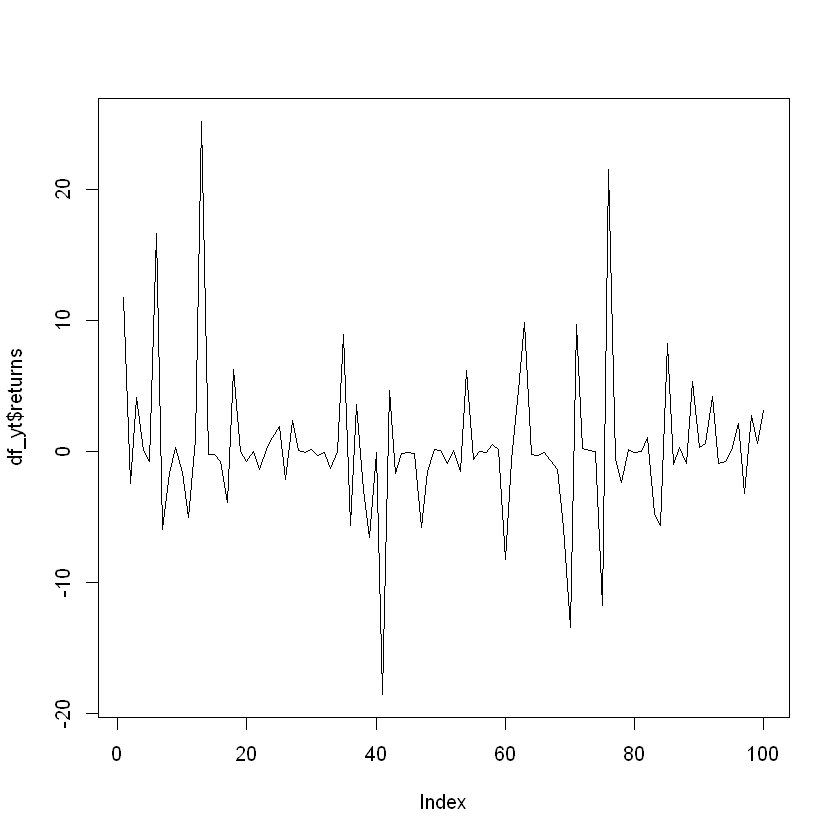

In [45]:
plot(df_yt$returns, type='l')

2. Utilize a função indicada no script de aula para estimar os parâmetros do modelo. Como as estimativas se
comparam com os valores utilizados para a simulação?


In [ ]:
library(depmixS4)

In [47]:
print(paste("Estado inicial: ", init_state))

[1] "Estado inicial:  3"


In [48]:
sigmas

[1]  0.1  1.0 15.0  5.0

In [49]:
mod = depmix(returns ~ 1, family = gaussian(), nstates = 4, data = df_yt)
fm2 = fit(mod, verbose = FALSE, message=FALSE)

converged at iteration 86 with logLik: -245.1584 


In [50]:
summary(fm2)

Initial state probabilities model 
pr1 pr2 pr3 pr4 
  0   0   1   0 

Transition matrix 
        toS1  toS2  toS3  toS4
fromS1 0.568 0.383 0.000 0.049
fromS2 0.184 0.534 0.255 0.027
fromS3 0.574 0.426 0.000 0.000
fromS4 0.000 0.000 1.000 0.000

Response parameters 
Resp 1 : gaussian 
    Re1.(Intercept) Re1.sd
St1          -0.116  0.350
St2          -1.245  3.089
St3           8.978  7.230
St4         -14.536  2.986


3. Realize uma simulação de Monte Carlo para estimar a esperança dos estimadores por EM implementados
nessa função. O que você pode afirmar sobre seu viés? (Dica: como os componentes de mistura não tem
um ordenamento inerente, é importante reordenar os componentes dos vetores e matriz de transição para
permitir a comparação. Uma sugestção é nomear os estados em ordem crescente de σ.)


In [ ]:
start_time = Sys.time()

REPEATS = 300
stds = matrix(ncol = 4, nrow = REPEATS)
means = matrix(ncol = 4, nrow = REPEATS)

mod <- depmix(returns ~ 1, family = gaussian(), nstates = 4, data = df_yt)

for (i in 1:REPEATS) {
#     yb = yt[sample(nrow(yt), length(yt), replace=T),]
#     df_yt = data.frame(state = yb[, 1], returns = yb[, 2])
    fm2 <- fit(mod, verbose = FALSE);
    params = as.data.frame(matrix(getpars(fm2)[21:28], # Estes parâmetros são as estimativas de média e variância
                                  byrow = TRUE, ncol = 2, 
                                  dimnames = list(
                                      NULL, c("mean", "std"))))
    
    stds[i, ] = params[order(params$std), ]$std
    means[i, ] = params[order(params$std), ]$mean
}

Sys.time() - start_time

In [52]:
apply(stds, 2, mean)

[1]  0.3821643  3.1045366  4.4773067 11.0893918

In [53]:
apply(means, 2, mean)

[1] -0.1074647 -4.3911833  0.3208213  5.4625277

Neste teste, as estimativas de $\sigma_i$ se aproximaram bastante dos valores utilizados para gerar os dados. Em outros testes realizados, com parâmetros geradores diferentes, o algoritmo apresentou maior dificuldade em convergir para um valor próximo do verdadeiro, dada a proximidade entre as distribuições. Além disso, conforme aumentei o número de replicações o erro da aproximação diminuiu. 